# Install Library

In [1]:
pip install finance-datareader


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

num_stocks = 500
num_stocks_preprocessed = 300

# KRX Stock Data Gathering

In [5]:
df_krx = fdr.StockListing('KRX-MARCAP')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,60400,2,-2200,-3.51,62500,62500,60400,15331184,935960853120,360574866020000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,584000,2,-1000,-0.17,585000,590000,578000,239024,139765656000,136656000000000,234000000,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,870000,2,-14000,-1.58,884000,885000,870000,37710,32966593000,61921380000000,71174000,STK
3,000660,KR7000660001,SK하이닉스,KOSPI,,81900,2,-2800,-3.31,83900,83900,81800,4594058,379357522580,59623393693500,728002365,STK
4,051910,KR7051910008,LG화학,KOSPI,,711000,2,-11000,-1.52,718000,728000,711000,163235,117044014000,50191155873000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,288490,KR7288490006,나라소프트,KONEX,일반기업부,52,1,2,4.00,47,53,46,50295,2448013,1983644000,38147000,KNX
2677,267810,KR7267810000,앙츠,KONEX,일반기업부,1105,2,-95,-7.92,1335,1335,1105,17,22190,1974635000,1787000,KNX
2678,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX
2679,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-pa

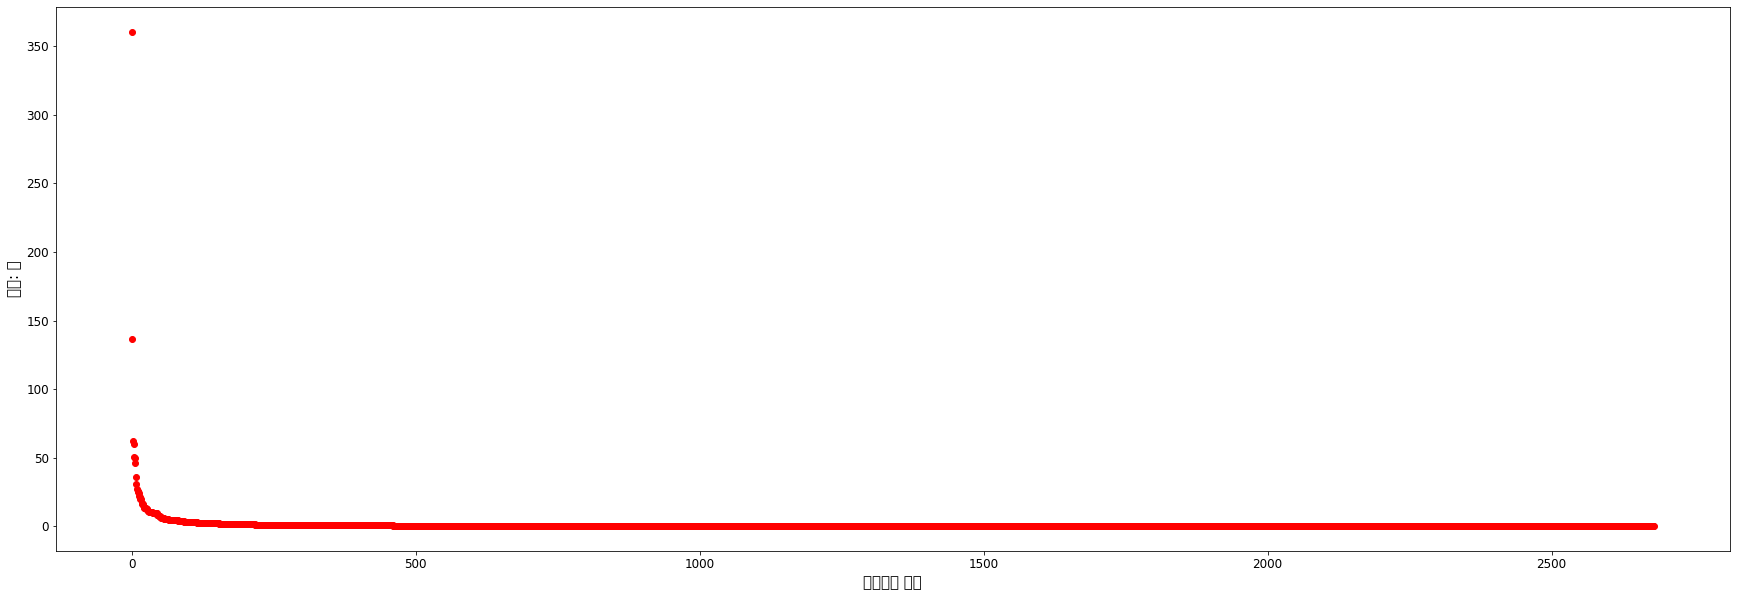

In [6]:
import matplotlib.pyplot as plt
from math import pow

plt.figure(figsize = (30, 10))
plt.plot(df_krx["Marcap"]/pow(10, 12), 'ro')

plt.xlabel("시가총액 등수", fontsize = 15)
plt.ylabel("단위: 조", fontsize = 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)


# 단위 억
plt.show()

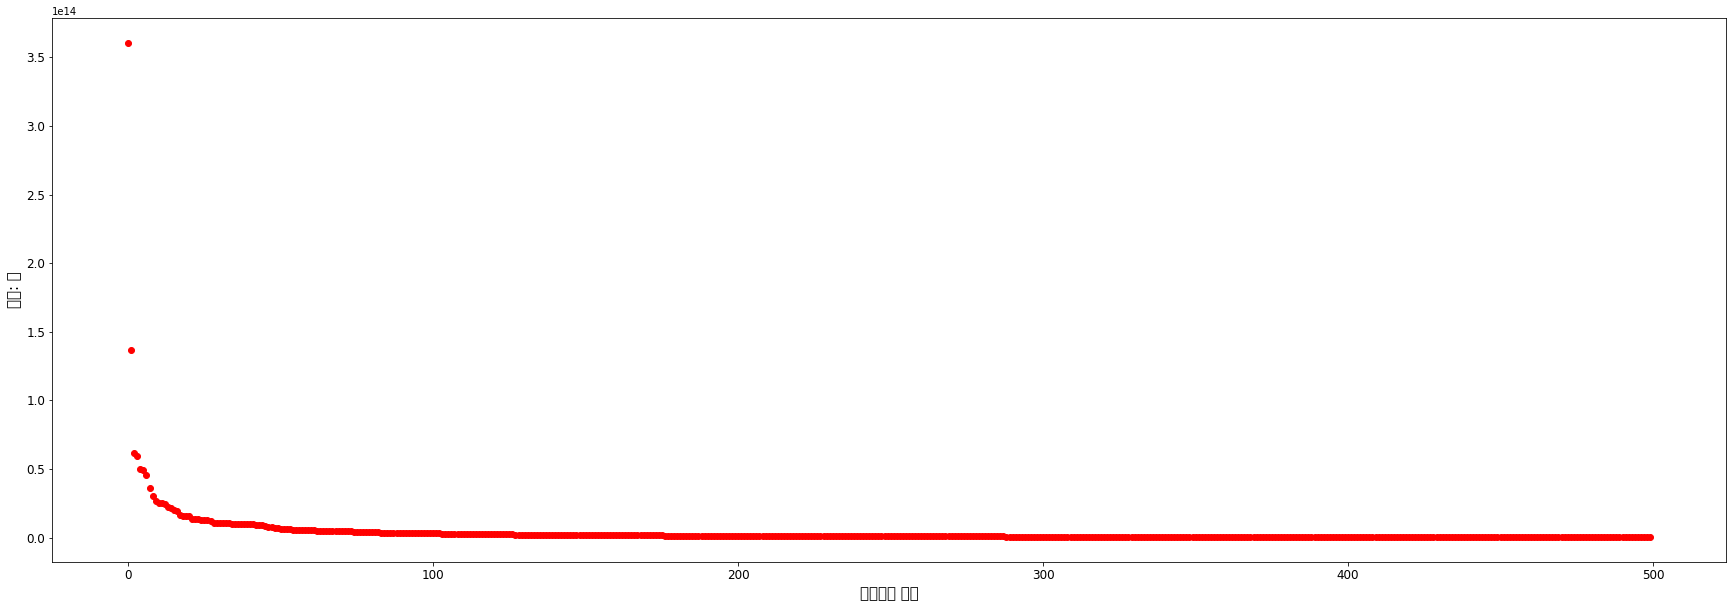

In [7]:
plt.figure(figsize = (30, 10))
plt.plot(df_krx["Marcap"][:num_stocks], 'ro')

plt.xlabel("시가총액 등수", fontsize = 15)
plt.ylabel("단위: 조", fontsize = 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

# 단위 조
plt.show()


In [8]:
start_date = '2010-12-30'
end_date = '2021-12-30'
df_list = []

for code in df_krx["Code"][:num_stocks]:
    series_close = fdr.DataReader(code, start_date, end_date)["Close"]
    df_list.append(series_close)

df_close = pd.concat(df_list, axis=1)
df_close.columns = df_krx["Name"][:num_stocks]
df_close


Name,삼성전자,LG에너지솔루션,삼성바이오로직스,SK하이닉스,LG화학,삼성SDI,삼성전자우,현대차,NAVER,기아,...,이수페타시스,신성이엔지,에이스침대,한일현대시멘트,맵스리얼티1,대원제약,코오롱플라스틱,에스피지,효성화학,한미글로벌
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-30,18980,NaN,NaN,24000,391000,168000,12980,173500,71256,50600,...,3251,6881,14800,29211,2703,4659,NaN,5390,NaN,13650
2011-01-03,19160,NaN,NaN,25300,390500,178000,13740,177000,69529,52500,...,3487,7005,14500,29380,2683,4481,NaN,5360,NaN,13250
2011-01-04,19160,NaN,NaN,25600,395000,179000,13820,178000,69529,55100,...,3394,6939,13900,29211,2655,4481,NaN,5290,NaN,13200
2011-01-05,18840,NaN,NaN,25900,418000,178000,13580,189000,69843,56900,...,3380,7087,13920,30989,2610,4463,NaN,5350,NaN,12950
2011-01-06,18600,NaN,NaN,26100,418000,180500,13420,194000,69529,57100,...,3603,6881,14000,30777,2662,4450,NaN,5290,NaN,13150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,80500,NaN,874642.0,128000,621000,651000,72800,215500,384000,85100,...,6420,2105,43900,33700,4840,16409,13700.0,11500,306500.0,11900
2021-12-27,80200,NaN,875631.0,126000,627000,644000,72400,213500,380500,84800,...,6410,2075,44950,34750,4835,16506,13850.0,11650,303000.0,12000
2021-12-28,80300,NaN,880572.0,127500,632000,651000,72400,214000,384500,84500,...,6700,2090,46000,35300,4810,16068,13050.0,11800,297000.0,12050


In [9]:
df_close = df_close.dropna(axis=1)
df_close = df_close.iloc[:, :num_stocks_preprocessed]
df_close.to_csv("../data/KRX_300_close")
df_close

Name,삼성전자,SK하이닉스,LG화학,삼성SDI,삼성전자우,현대차,NAVER,기아,카카오,POSCO홀딩스,...,세아홀딩스,풀무원,삼표시멘트,송원산업,위메이드맥스,이엔플러스,성광벤드,국도화학,포스코엠텍,신영증권우
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-30,18980,24000,391000,168000,12980,173500,71256,50600,15495,487000,...,130000,4110,3484,12600,12712,1742,23550,40208,6550,29700
2011-01-03,19160,25300,390500,178000,13740,177000,69529,52500,15415,486000,...,133500,4180,3537,12600,12269,1843,23650,39433,6480,29800
2011-01-04,19160,25600,395000,179000,13820,178000,69529,55100,15575,499500,...,129000,4175,3537,12850,11959,1907,25200,38658,6470,29850
2011-01-05,18840,25900,418000,178000,13580,189000,69843,56900,15655,507000,...,130000,4120,3537,13700,11870,1811,25300,38000,6460,29850
2011-01-06,18600,26100,418000,180500,13420,194000,69529,57100,15696,507000,...,130500,4000,3502,13750,11693,1880,25650,38000,6590,30650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,80500,128000,621000,651000,72800,215500,384000,85100,114500,284000,...,103500,17450,4805,20900,39650,3455,7840,57900,8000,59900
2021-12-27,80200,126000,627000,644000,72400,213500,380500,84800,113000,281500,...,103500,17450,4800,20400,40800,3320,7800,58800,7900,60500
2021-12-28,80300,127500,632000,651000,72400,214000,384500,84500,113500,283500,...,105000,17450,4920,20300,46300,3680,7810,59300,7820,60400


In [10]:
df_returns = df_close.pct_change()
df_returns = df_returns.iloc[1:, :]
df_returns


Name,삼성전자,SK하이닉스,LG화학,삼성SDI,삼성전자우,현대차,NAVER,기아,카카오,POSCO홀딩스,...,세아홀딩스,풀무원,삼표시멘트,송원산업,위메이드맥스,이엔플러스,성광벤드,국도화학,포스코엠텍,신영증권우
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0.009484,0.054167,-0.001279,0.059524,0.058552,0.020173,-0.024237,0.037549,-0.005163,-0.002053,...,0.026923,0.017032,0.015212,0.000000,-0.034849,0.057979,0.004246,-0.019275,-0.010687,0.003367
2011-01-04,0.000000,0.011858,0.011524,0.005618,0.005822,0.005650,0.000000,0.049524,0.010380,0.027778,...,-0.033708,-0.001196,0.000000,0.019841,-0.025267,0.034726,0.065539,-0.019654,-0.001543,0.001678
2011-01-05,-0.016701,0.011719,0.058228,-0.005587,-0.017366,0.061798,0.004516,0.032668,0.005136,0.015015,...,0.007752,-0.013174,0.000000,0.066148,-0.007442,-0.050341,0.003968,-0.017021,-0.001546,0.000000
2011-01-06,-0.012739,0.007722,0.000000,0.014045,-0.011782,0.026455,-0.004496,0.003515,0.002619,0.000000,...,0.003846,-0.029126,-0.009895,0.003650,-0.014912,0.038100,0.013834,0.000000,0.020124,0.026801
2011-01-07,-0.009677,0.000000,-0.005981,-0.013850,-0.011923,0.020619,0.015806,0.021016,0.024274,-0.031558,...,0.000000,0.001250,-0.042833,0.007273,0.026512,-0.012234,-0.021442,0.072342,-0.018209,-0.017945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,0.007509,0.003922,-0.020505,0.012442,0.006916,0.031100,0.015873,0.010689,0.013274,0.001764,...,-0.014286,-0.002857,0.000000,-0.018779,-0.003769,0.072981,0.005128,0.028419,-0.012346,0.003350
2021-12-27,-0.003727,-0.015625,0.009662,-0.010753,-0.005495,-0.009281,-0.009115,-0.003525,-0.013100,-0.008803,...,0.000000,0.000000,-0.001041,-0.023923,0.029004,-0.039074,-0.005102,0.015544,-0.012500,0.010017
2021-12-28,0.001247,0.011905,0.007974,0.010870,0.000000,0.002342,0.010512,-0.003538,0.004425,0.007105,...,0.014493,0.000000,0.025000,-0.004902,0.134804,0.108434,0.001282,0.008503,-0.010127,-0.001653


In [11]:
df_returns.to_csv("../data/KRX_300_returns")

# NASDAQ Data Gathering

In [12]:
df_nasdaq = fdr.StockListing('NASDAQ')
df_nasdaq

100%|██████████| 4575/4575 [00:11<00:00, 398.87it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOG,Alphabet Inc Class C,소프트웨어 및 IT서비스,572010
...,...,...,...,...
4570,SVIIR,Spring Valley Acquisition II Rights Exp 12th O...,기타 금융업,556010
4571,INTS,Intensity Therapeutics Inc,생명과학 및 메디컬 리서치,562020
4572,GLSTR,Global Star Acquisition Rights Exp 21st June 2024,기타 금융업,556010
4573,JEWL,Adamas One Corp,섬유 및 의류,532020


In [17]:
start_date = '2010-12-31'
end_date = '2021-12-30'
df_list = []
stock_name_list = []
    
for i, code in enumerate(df_nasdaq["Symbol"][:num_stocks]):
    try:        
        series_close = fdr.DataReader(code, start_date, end_date)["Close"]
        df_list.append(series_close)
        stock_name_list.append(df_nasdaq["Name"][i])
        
    except KeyError:
        print('최근 자료를 불러올 수 없습니다')
        
    except IndexError:
        print('최근 자료를 불러올 수 없습니다')


df_close_nasdaq = pd.concat(df_list, axis = 1)

df_close_nasdaq.columns = stock_name_list
df_close_nasdaq


HTTP Error 400: Bad Request  - symbol "CEG"not found or invalid periods
최근 자료를 불러올 수 없습니다
HTTP Error 400: Bad Request  - symbol "MBLY"not found or invalid periods
최근 자료를 불러올 수 없습니다
HTTP Error 404: Not Found  - symbol "PPD"not found or invalid periods
최근 자료를 불러올 수 없습니다
HTTP Error 400: Bad Request  - symbol "UHALB"not found or invalid periods
최근 자료를 불러올 수 없습니다
HTTP Error 400: Bad Request  - symbol "TPG"not found or invalid periods
최근 자료를 불러올 수 없습니다
HTTP Error 404: Not Found  - symbol "CREE"not found or invalid periods
최근 자료를 불러올 수 없습니다
HTTP Error 404: Not Found  - symbol "PBCT"not found or invalid periods
최근 자료를 불러올 수 없습니다
HTTP Error 404: Not Found  - symbol "ROLL"not found or invalid periods
최근 자료를 불러올 수 없습니다
HTTP Error 400: Bad Request  - symbol "ACDC"not found or invalid periods
최근 자료를 불러올 수 없습니다


,Apple Inc,Microsoft Corp,Amazon.com Inc,Alphabet Inc Class A,Alphabet Inc Class C,Tesla Inc,NVIDIA Corp,Meta Platforms Inc Class A,PepsiCo Inc,ASML Holding NV ADR,...,International Bancshares Corp,iRhythm Technologies Inc,Evotec SE ADR,Surgery Partners Inc,Beam Therapeutics Inc,Blackbaud Inc,Bumble Inc Class A,Goodyear Tire & Rubber Co,Inmode Ltd,Mr Cooper Group Inc
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,11.520000,27.910000,9.000000,14.864114,14.793799,1.775333,3.850000,NaN,65.330002,38.340000,...,20.030001,NaN,1.840000,NaN,NaN,25.900000,NaN,11.85,NaN,NaN
2011-01-03,11.770357,27.980000,9.211000,15.123874,15.052330,1.774667,3.955000,NaN,65.750000,38.660000,...,20.660000,NaN,2.070000,NaN,NaN,26.580000,NaN,12.24,NaN,NaN
2011-01-04,11.831786,28.090000,9.250500,15.068068,14.996788,1.778000,3.942500,NaN,65.410004,37.389999,...,20.250000,NaN,2.040000,NaN,NaN,26.129999,NaN,12.32,NaN,NaN
2011-01-05,11.928571,28.000000,9.371000,15.241992,15.169890,1.788667,4.245000,NaN,66.589996,36.630001,...,20.639999,NaN,2.010000,NaN,NaN,26.530001,NaN,12.70,NaN,NaN
2011-01-06,11.918929,28.820000,9.293000,15.352853,15.280226,1.858667,4.832500,NaN,66.839996,36.320000,...,20.030001,NaN,2.040000,NaN,NaN,26.600000,NaN,12.27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,175.639999,333.200012,171.037003,146.414993,146.949005,336.290009,294.000000,330.450012,169.970001,792.119995,...,41.310001,119.480003,22.320000,52.400002,85.730003,81.099998,34.580002,20.77,71.389999,41.419998
2021-12-23,176.279999,334.690002,171.068497,146.916504,147.142502,355.666656,296.399994,335.239990,169.779999,801.409973,...,41.299999,118.809998,22.620001,53.490002,86.500000,81.639999,34.869999,21.07,72.070000,41.650002
2021-12-27,180.330002,342.450012,169.669495,147.906494,148.063995,364.646667,309.450012,346.179993,171.470001,811.429993,...,41.939999,119.029999,23.420000,54.360001,80.199997,82.730003,33.860001,21.41,72.019997,41.889999


In [18]:
df_close_nasdaq = df_close_nasdaq.dropna(axis=1)

df_close_nasdaq = df_close_nasdaq.iloc[:, :num_stocks_preprocessed]
df_close_nasdaq.to_csv("../data/NASDAQ_300_close")
df_close_nasdaq

,Apple Inc,Microsoft Corp,Amazon.com Inc,Alphabet Inc Class A,Alphabet Inc Class C,Tesla Inc,NVIDIA Corp,PepsiCo Inc,ASML Holding NV ADR,Broadcom Inc,...,Cytokinetics Inc,Franklin Electric Co Inc,Altra Industrial Motion Corp,Potlatchdeltic Corp,Beacon Roofing Supply Inc,Patterson-UTI Energy Inc,Pan American Silver Corp,Ameris Bancorp,Insight Enterprises Inc,Neogen Corp
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,11.520000,27.910000,9.000000,14.864114,14.793799,1.775333,3.850000,65.330002,38.340000,28.410000,...,12.540000,19.459999,19.860001,32.549999,17.870001,21.549999,41.209999,10.540000,13.160000,10.260065
2011-01-03,11.770357,27.980000,9.211000,15.123874,15.052330,1.774667,3.955000,65.750000,38.660000,27.799999,...,12.960000,19.680000,20.820000,32.980000,17.990000,21.740000,40.750000,10.850000,13.750000,10.567642
2011-01-04,11.831786,28.090000,9.250500,15.068068,14.996788,1.778000,3.942500,65.410004,37.389999,28.000000,...,12.780000,19.990000,20.900000,32.619999,18.030001,20.950001,39.000000,10.580000,13.600000,10.360090
2011-01-05,11.928571,28.000000,9.371000,15.241992,15.169890,1.788667,4.245000,66.589996,36.630001,27.990000,...,12.780000,20.415001,20.850000,33.020000,18.059999,20.780001,38.180000,11.070000,13.700000,9.984996
2011-01-06,11.918929,28.820000,9.293000,15.352853,15.280226,1.858667,4.832500,66.839996,36.320000,28.520000,...,12.660000,20.459999,20.870001,33.250000,18.160000,20.250000,36.970001,11.100000,13.630000,9.752438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,175.639999,333.200012,171.037003,146.414993,146.949005,336.290009,294.000000,169.970001,792.119995,655.200012,...,44.020000,91.209999,49.990002,57.130001,55.279999,8.800000,24.889999,48.849998,102.650002,44.930000
2021-12-23,176.279999,334.690002,171.068497,146.916504,147.142502,355.666656,296.399994,169.779999,801.409973,664.799988,...,44.660000,91.419998,50.980000,56.580002,56.290001,8.750000,25.020000,49.209999,103.220001,44.410000
2021-12-27,180.330002,342.450012,169.669495,147.906494,148.063995,364.646667,309.450012,171.470001,811.429993,674.280029,...,45.849998,93.230003,51.849998,57.570000,56.939999,8.940000,25.170000,49.750000,104.000000,46.650002


In [19]:
df_return_nasdaq = df_close_nasdaq.pct_change()
df_return_nasdaq = df_return_nasdaq.iloc[1:, :]
df_return_nasdaq

,Apple Inc,Microsoft Corp,Amazon.com Inc,Alphabet Inc Class A,Alphabet Inc Class C,Tesla Inc,NVIDIA Corp,PepsiCo Inc,ASML Holding NV ADR,Broadcom Inc,...,Cytokinetics Inc,Franklin Electric Co Inc,Altra Industrial Motion Corp,Potlatchdeltic Corp,Beacon Roofing Supply Inc,Patterson-UTI Energy Inc,Pan American Silver Corp,Ameris Bancorp,Insight Enterprises Inc,Neogen Corp
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0.021732,0.002508,0.023444,0.017476,0.017476,-0.000375,0.027273,0.006429,0.008346,-0.021471,...,0.033493,0.011305,0.048338,0.013210,0.006715,0.008817,-0.011162,0.029412,0.044833,0.029978
2011-01-04,0.005219,0.003931,0.004288,-0.003690,-0.003690,0.001878,-0.003161,-0.005171,-0.032851,0.007194,...,-0.013889,0.015752,0.003842,-0.010916,0.002224,-0.036339,-0.042945,-0.024885,-0.010909,-0.019640
2011-01-05,0.008180,-0.003204,0.013026,0.011543,0.011543,0.005999,0.076728,0.018040,-0.020326,-0.000357,...,0.000000,0.021261,-0.002392,0.012262,0.001664,-0.008115,-0.021026,0.046314,0.007353,-0.036206
2011-01-06,-0.000808,0.029286,-0.008324,0.007273,0.007273,0.039135,0.138398,0.003754,-0.008463,0.018935,...,-0.009390,0.002204,0.000959,0.006965,0.005537,-0.025505,-0.031692,0.002710,-0.005109,-0.023291
2011-01-07,0.007161,-0.007634,-0.001991,0.004792,0.004792,0.012912,0.027936,-0.006732,-0.000275,-0.008415,...,-0.023697,-0.008064,0.005750,0.002406,-0.003855,-0.012840,-0.004869,-0.010811,0.004402,-0.001282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,0.015319,0.018057,0.003638,0.020509,0.018919,0.074947,0.011178,0.006216,0.011596,0.013865,...,0.078129,0.013219,0.012353,0.025673,0.031151,0.009174,0.011377,0.013485,0.009341,0.017206
2021-12-23,0.003644,0.004472,0.000184,0.003425,0.001317,0.057619,0.008163,-0.001118,0.011728,0.014652,...,0.014539,0.002302,0.019804,-0.009627,0.018271,-0.005682,0.005223,0.007370,0.005553,-0.011574
2021-12-27,0.022975,0.023186,-0.008178,0.006738,0.006263,0.025248,0.044028,0.009954,0.012503,0.014260,...,0.026646,0.019799,0.017065,0.017497,0.011547,0.021714,0.005995,0.010973,0.007557,0.050439


In [20]:
df_return_nasdaq.to_csv("../data/NASDAQ_300_returns")